# FTSE 350 Insider

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
from datetime import timedelta as td
from datetime import datetime as dt
from tqdm.notebook import tqdm
import time
plt.style.use('seaborn')

In [2]:
df = pd.read_html('https://www.fidelity.co.uk/shares/ftse-350/')[0]
df.columns = df.columns.str.lower()

In [3]:
comps = df[df.sector == 'Hotels & Entertainment Services']
comps

,epic,name,sector
1,888,888 Holdings,Hotels & Entertainment Services
59,CCL,Carnival plc,Hotels & Entertainment Services
62,CINE,Cineworld Group plc,Hotels & Entertainment Services
70,CPG,Compass Group plc,Hotels & Entertainment Services
87,DOM,Domino's Pizza Group plc,Hotels & Entertainment Services
92,EIG,EI Group plc,Hotels & Entertainment Services
112,FLTR,Flutter Entertainment,Hotels & Entertainment Services
131,GRG,Greggs Plc,Hotels & Entertainment Services
132,GVC,GVC Holdings plc,Hotels & Entertainment Services
161,IHG,InterContinental Hotels Group plc,Hotels & Entertainment Services


In [4]:
def pull_ticker(tick):
    d = web.DataReader(f'{tick}UK' if tick[-1] == '.' else f'{tick}.UK','stooq')
    d = d.reset_index()
    d.columns = d.columns.str.lower()
    d.date = d.date.astype(str)
    return d

In [6]:
stocks = dict()
tickers = comps.epic.values.ravel().tolist()
for tick in tqdm(tickers):
    if tick not in stocks.keys():
        try:
            stocks[tick] = pull_ticker(tick)
        except Exception as e:
            print(f'Ticker: {tick} - err: {e}')

Ticker: EIG - err: 'DataFrame' object has no attribute 'date'



In [10]:
stocks_copy = stocks.copy()
stks = pd.DataFrame({'date':pd.date_range(dt(2019,1,1),dt.now())})
stks.date = stks.date.astype(str)
for k,v in stocks_copy.items():
    
    if k not in v.columns.tolist()[-1]:
        v.columns = ['date'] + [ f'{k}_{x}' for x in v.columns if x != 'date']
    stks = stks.merge(v,on='date',how='left')

In [11]:
sdf = stks.set_index('date').fillna(method='ffill').fillna(method='bfill')
sdf[:3]

,888_open,888_high,888_low,888_close,888_volume,CCL_open,CCL_high,CCL_low,CCL_close,CCL_volume,...,WTB_open,WTB_high,WTB_low,WTB_close,WTB_volume,WMH_open,WMH_high,WMH_low,WMH_close,WMH_volume
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,175.21,175.21,165.51,166.01,798893.0,3761.37,3848.31,3699.41,3838.31,1050503.0,...,4488.42,4516.77,4415.09,4498.19,307909.0,138.88,141.77,134.40,140.56,7562977.0
2019-01-02,175.21,175.21,165.51,166.01,798893.0,3761.37,3848.31,3699.41,3838.31,1050503.0,...,4488.42,4516.77,4415.09,4498.19,307909.0,138.88,141.77,134.40,140.56,7562977.0
2019-01-03,166.51,169.21,162.31,162.51,442418.0,3829.32,3833.31,3706.41,3728.40,898363.0,...,4489.39,4550.01,4468.86,4482.56,414143.0,139.41,147.76,139.37,140.38,6014677.0


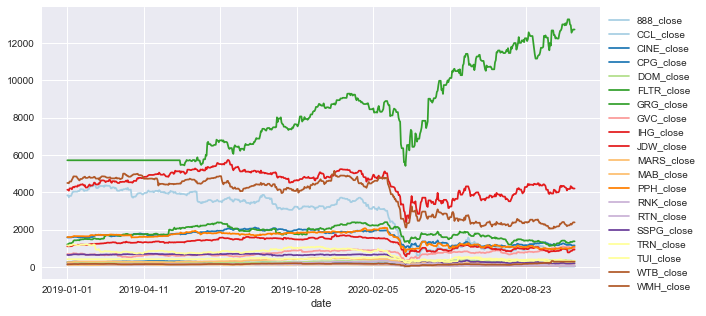

In [12]:
sdf.fillna(method='ffill').fillna(method='bfill')[sdf.columns[sdf.columns.str.contains('_close')]].plot(figsize=(10,5),cmap='Paired').legend(bbox_to_anchor=(1.0,1.0));

<AxesSubplot:>

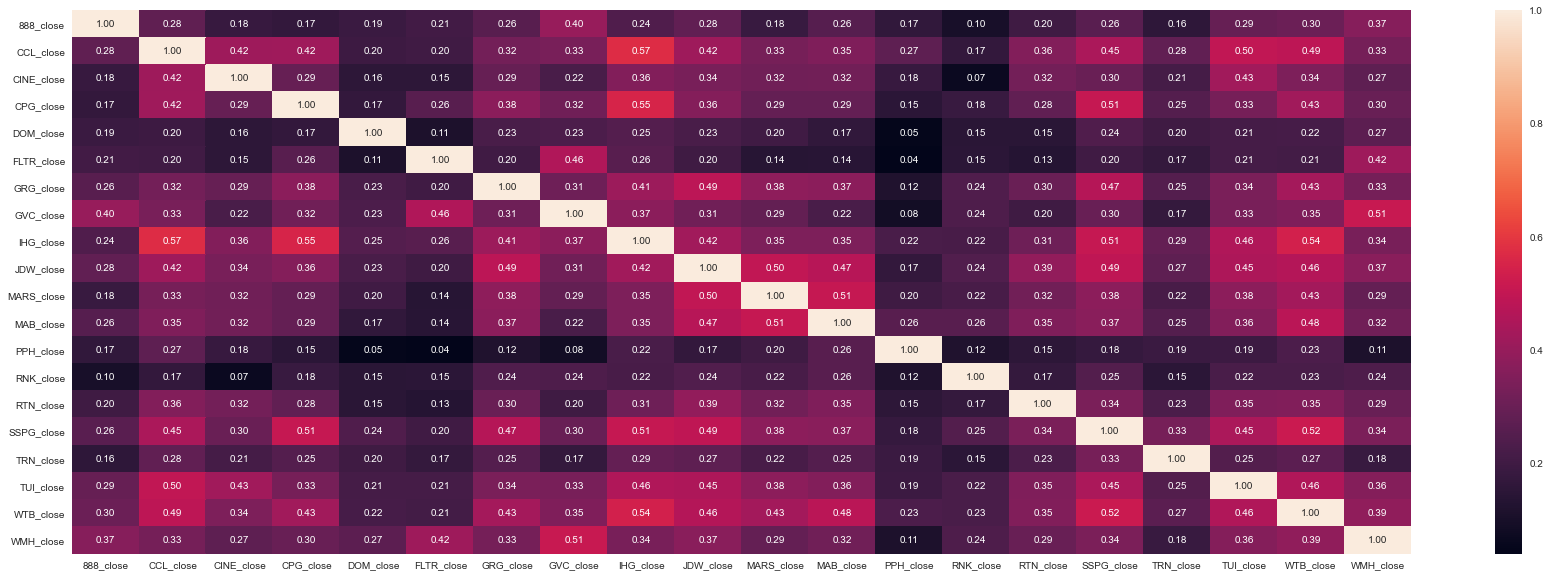

In [13]:
plt.figure(figsize=(30,10))
sns.heatmap(sdf[sdf.columns[sdf.columns.str.contains('_close')]].pct_change()[2:].corr(method='spearman'),annot=True,fmt='.2f')